In [1]:
import numpy as np
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab
from pylab import plot
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [27]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data

print len(w)
print len(r)

Reading files
132684
26111


In [3]:
print 'catalog with values RA and DEC'
cw = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.degree) 
cr = SkyCoord(ra = r['RA']*u.degree, dec = r['DEC']*u.degree) 

catalog with values RA and DEC


Histograms


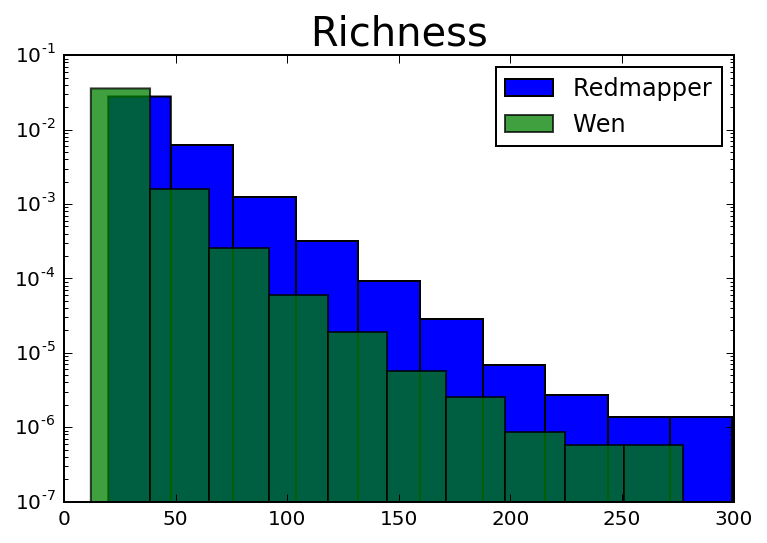

In [4]:
print 'Histograms'
h_r = plt.hist((r['LAMBDA']), normed=True, log = True, label = 'Redmapper')
h_r = plt.hist((w['RL*']), normed=True, log = True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize = '20')

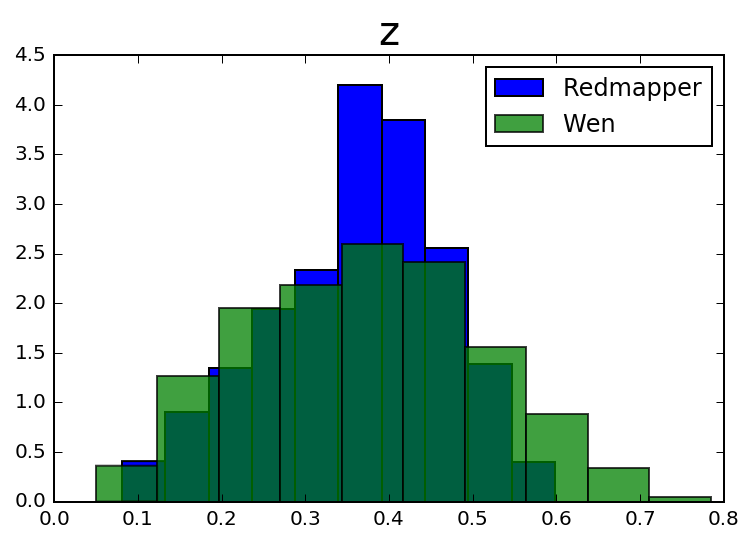

In [5]:
h_z = plt.hist(r['z_lambda'], normed=True, label = 'Redmapper')
h_z = plt.hist(w['zph'], normed=True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('z', fontsize='20')

In [33]:
print("\033[43;30mSky - Code, Histograms, Plots and Macth\033[m")
# indices do tamanho do catalogo originais?    
print 'match to catalog sky'
idwx, d2d, d3d = cw.match_to_catalog_sky(cr) 
print 'Match Wen em relacao ao Redmapper =',len(idwx)
print idwx, d2d, d3d 

print 'match to catalog sky'
idrx, d2d, d3d = cr.match_to_catalog_sky(cw) 
print 'Match Redmapper em relacao ao Wen =',len(idrx)
print idrx, d2d, d3d 


Sky - Code, Histograms, Plots and Macth
match to catalog sky
Match Wen em relacao ao Redmapper = 132684
[ 3323  9032  3202 ...,  9829  2359 23322] [u'0d04m03.6219s' u'0d00m00.0182s' u'0d32m26.5436s' ..., u'0d13m51.3945s'
 u'0d09m23.3753s' u'0d18m22.1316s'] [  1.18111231e-03   8.82671400e-08   9.43707448e-03 ...,   4.03071155e-03
   2.73131982e-03   5.34327843e-03]
match to catalog sky
Match Redmapper em relacao ao Wen = 26111
[102163 107605  76974 ...,  66087  49087  38461] [u'0d00m00.0109s' u'0d00m00.0063s' u'0d00m00.0168s' ..., u'0d05m44.4567s'
 u'0d12m53.5536s' u'0d10m57.2354s'] [  5.29359757e-08   3.05118346e-08   8.15707840e-08 ...,   1.66997298e-03
   3.75029169e-03   3.18636589e-03]


Plot ra x dec - sky


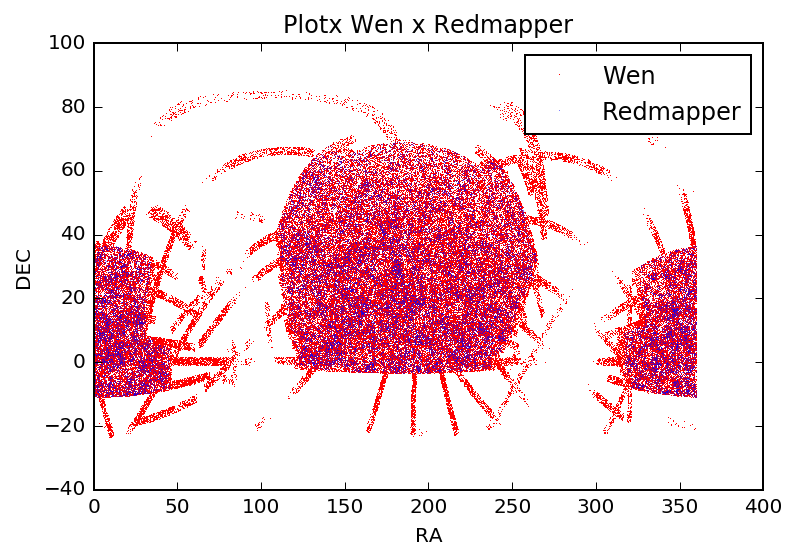

In [7]:
print 'Plot ra x dec - sky'
ra_w = w['RAJ2000']*u.deg
dec_w = w['DEJ2000']*u.deg

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(ra_w, dec_w, 'r,', label = 'Wen')

ra_r = r['RA']*u.deg 
dec_r = r['DEC']*u.deg

ax.plot(ra_r, dec_r, 'b,', label = 'Redmapper', alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')

ax.legend(numpoints=1)
plt.title('Plotx Wen x Redmapper')
#savefig('Plot-Sky.png')
 

We need to verify the distribution of redshift and richness of both original samples and matched.

We need to check that the match works by plotting position of matched over original (use plot limits such that you are able to discern them (zoom)).

z vs z (matched), richness vs richness (matched).

In [31]:
print 'Objects around to catalog sky'
idxcw, idxcr, d2d, d3d = cr.search_around_sky(cw, 4*u.arcmin)
print len(idxcw), len(idxcr)
#print idxc_w, idxc_r, d2d, d3d 
# produzindo mais matches do que o catalogo do rykoff tem
objw = idxcw
objr = idxcr

o_w = w[objw]
o_r = r[objr]

print len(o_w)
print len(o_r)

print 'mean and standard deviation'

delta_ra = o_w['RAJ2000'] - o_r['RA']  
delta_dec = o_w['DEJ2000'] - o_r['DEC']  

media_ra = delta_ra.mean()
media_dec = delta_dec.mean()

sigma_ra = delta_ra.std()
sigma_dec = delta_dec.std()

print 'Media RA =',media_ra
print 'Media DEC =',media_dec 
print 'Desvio Padrao RA =',sigma_ra
print 'Desvio Padrao DEC =',sigma_dec

print 'Completeness - sky'
Red_w = w['zph']
Red_r = r['Z_LAMBDA']
Red_w_m = o_w['zph']
Red_r_m = o_r ['Z_LAMBDA']
Completeness_w = (Red_w_m[0])/(Red_w[0])
Completeness_r = (Red_r_m[0])/(Red_r[0])
Completeness_w_r = (Red_w_m[0]/Red_r[0])
Completeness_r_w = (Red_r_m[0])/(Red_w[0])
print Completeness_w, Completeness_r, Completeness_w_r, Completeness_r_w


Objects around to catalog sky
27310 27310
27310
27310
mean and standard deviation
Media RA = 5.21087605946e-05
Media DEC = 0.000149241140332
Desvio Padrao RA = 0.0219988653301
Desvio Padrao DEC = 0.0180868328784
Completeness - sky
1.33124018838 1.80683 1.78845094062 1.34491939185


 Histogram z - Sky 


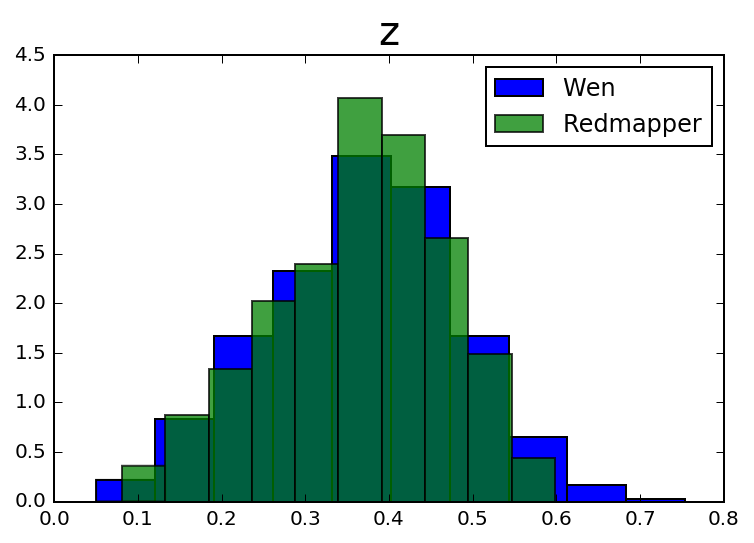

In [9]:
print ' Histogram z - Sky '
ho_z = plt.hist(o_w['zph'], normed=True, label = 'Wen')
ho_z = plt.hist(o_r['Z_LAMBDA'], normed=True, label = 'Redmapper', alpha=0.75)
plt.title('z', fontsize='20')
plt.legend()

Dados - Macth Wen/Wen:
Wen = 132684 e Match Wen = 27310
Calculo da Completeza


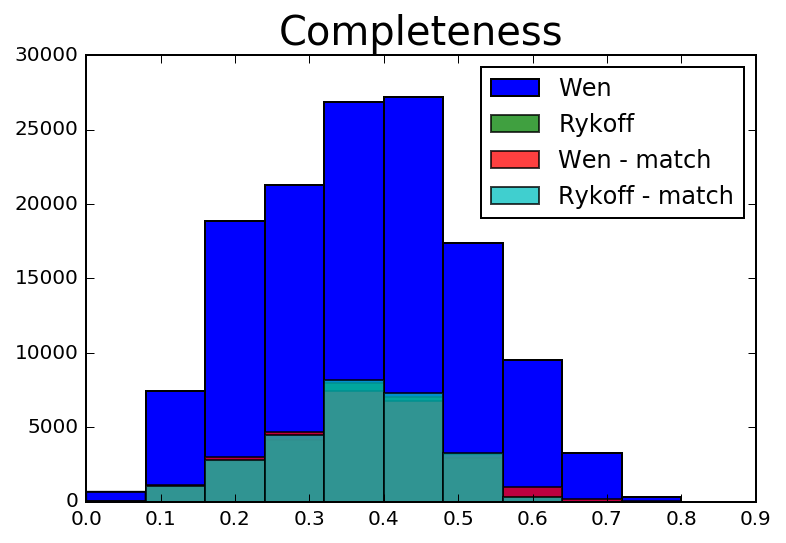

In [24]:
print 'Dados - Macth Wen/Wen:'

Red_w = (w['zph'])
Red_w_m = (o_w['zph'])
R_W = len(Red_w)
R_W_M = len(Red_w_m)
print 'Wen =', R_W, 'e Match Wen =', R_W_M

print 'Calculo da Completeza'

Hist_w = plt.hist(Red_w, label = 'Wen', range = [0, 0.8])
Hist_r = plt.hist(Red_r, alpha = 0.75, label = 'Rykoff', range = [0, 0.8])
Hist_w_m = plt.hist(Red_w_m, alpha = 0.75, label = 'Wen - match', range = [0, 0.8])
Hist_r_m = plt.hist(Red_r_m, alpha = 0.75, label = 'Rykoff - match', range = [0, 0.8])


plt.title('Completeness', fontsize='20')
plt.ylim(0,30000)
plt.xlim(0, 0.9)
plt.legend()
                    

10 11


/home/ogando/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


(0, 1.5)

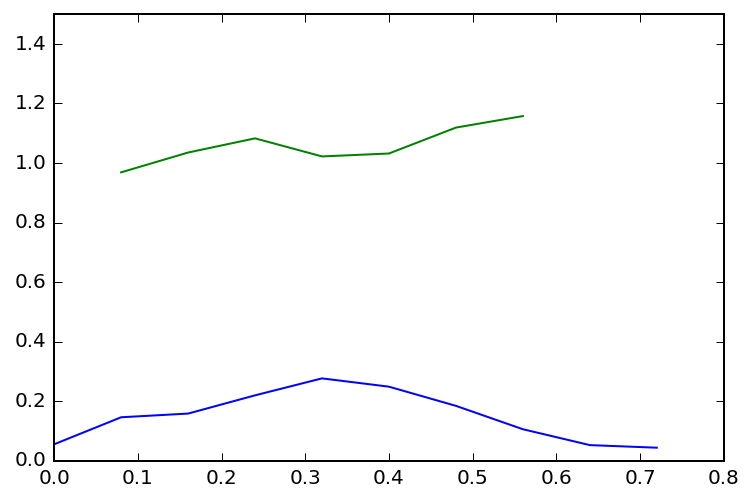

In [25]:
# Hist_w contains counts, bins, and stuff...
print len(Hist_w[0]), len(Hist_w[1])
plt.plot(Hist_w[1][:-1], Hist_w_m[0]/Hist_w[0])
plt.plot(Hist_w[1][:-1], Hist_r_m[0]/Hist_r[0])

plt.ylim(0, 1.5)
# isso está estranho. completeza > 1. a raiz está no match nas celulas acima. verificar.

In [ ]:
print 'Dados - Macth Redmapper/Redmapper:'

Red_r = (r['Z_LAMBDA'])
Red_r_m = (o_r['Z_LAMBDA'])
R_R = len(Red_r)
R_R_M = len(Red_r_m)
print 'Redmapper =', R_R, 'e Match Redmapper =', R_R_M

print 'Calculo da Completeza'

Hist_r = plt.hist(Red_r, label = 'z', range = [0, 0.8])
Hist_r_m = plt.hist(Red_r_m, alpha = 0.5, label = 'z - match', range = [0, 0.8])
plt.ylim(0,30000)
plt.xlim(0, 0.9)
plt.title('Completeness', fontsize='20')
plt.legend()

In [ ]:
print 'Dados - Match Redmapper/Wen:'

Red_w = (w['zph'])
Red_r_m = (o_r['Z_LAMBDA'])
R_W = len(Red_w)
R_R_M = len(Red_r_m)
print 'Wen =', R_W, 'e Match Redmapper =', R_R_M

print 'Calculo da Completeza'

Hist_w = plt.hist(Red_w, label = 'z', range = [0, 0.8])
Hist_r_m = plt.hist(Red_r_m, alpha = 0.75, label = 'z - match', range = [0, 0.8])
plt.ylim(0,30000)
plt.xlim(0, 0.9)
plt.title('Completeness', fontsize='20')
plt.legend()



In [ ]:
print 'Dados - Match Wen/Redmapper:'

Red_r = (r['Z_LAMBDA'])
Red_w_m = (o_w['zph'])
R_R = len(Red_r)
R_W_M = len(Red_w_m)
print 'Redmapper =', R_R, 'e Match Wen =', R_W_M

print 'Calculo da Completeza'

Hist_r = plt.hist(Red_r, label = 'z', range = [0, 0.8])
Hist_w_m = plt.hist(Red_w_m, alpha = 0.5, label = 'z - match', range = [0, 0.8])
plt.ylim(0,30000)
plt.xlim(0, 0.9)
plt.title('Completeness', fontsize='20')
plt.legend()

In [ ]:
print 'Plot z - Sky '
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_w['zph'], o_r['Z_LAMBDA'], 'b,')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
z = o_w['zph'] - o_r['Z_LAMBDA'] 
z_m = z
media = z_m.mean()
sigma = z_m.std()
print 'Media =',media
print 'Desvio Pdrao =',sigma
ax.plot (o_w['zph'], z, 'g,')
plt.xlim(0, 0.8)
plt.ylabel('Z_LAMBDA - zph')
plt.xlabel('zph')

In [ ]:
print 'Histogram richness - Sky'
ho_r = plt.hist(o_r['LAMBDA'], normed=True, log=True, label='Redmapper')
ho_r = plt.hist(o_w['RL*'], normed=True, log=True, label='Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize='20')

In [ ]:
print 'Plot richness - Sky'
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_w['RL*'], o_r['LAMBDA'], 'r,')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness', fontsize = 20)


idxcw, idxcr, d2d, d3d = cw.search_around_sky(cr, 4*u.arcmin)
#print idxc_w, idxc_r, d2d, d3d 

In [ ]:
print("\033[43;30m3D - Code, Histograms, Plots and Macth\033[m")

print 'catalog with values RA, DEC and z'
c_w = SkyCoord(ra = w['RAJ2000']*u.deg, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))

print 'Plot ra, dec and z - 3d'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [w['RAJ2000']]
y = [w['DEJ2000']]
z = [w['zph']]

ax.scatter(x,z,y, c='r', marker = 'o', s=1)

ax.set_xlabel('RA')
ax.set_zlabel('DEC')
ax.set_ylabel('z')
ax.set_title('Wen')

#savefig('Plot-3d-Wen.png'), close()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = [r['RA']]
b = [r['DEC']]
c = [r['Z_LAMBDA']]

ax.scatter(a,c,b, c='b', marker = 'o', s=1)

ax.set_xlabel('RA')
ax.set_zlabel('DEC')
ax.set_ylabel('z')
ax.set_title('Redmapper')

#savefig('Plot-3d-Red.png')

In [ ]:
print 'match to catalog 3d'
idx, d2d, d3d = c_w.match_to_catalog_3d(c_r) 
print 'Match Wen em relacao ao Redmapper =',len(idx)
#print idx, d2d, d3d 

print 'match to catalog 3d'
idx, d2d, d3d = c_r.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idx)
#print idx, d2d, d3d 

In [ ]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 1000*u.kpc) 
print len(idxc_w), len(idxc_r)
#print idxc_w, idexc_r, d2d, d3d

obje_w = idxc_w
obje_r = idxc_r

o_we = w[obje_w]
o_re = r[obje_r]

print 'mean and standard deviation'

delta_ra = o_re['RA'] - o_we['RAJ2000'] 
delta_dec = o_re['DEC'] - o_we['DEJ2000'] 

media_ra = delta_ra.mean()
media_dec = delta_dec.mean()

sigma_ra = delta_ra.std()
sigma_dec = delta_dec.std()

print 'Media RA =',media_ra
print 'Media DEC =',media_dec 
print 'Desvio Padrao RA =',sigma_ra
print 'Desvio Padrao DEC =',sigma_dec

print 'Completeness - sky'
Red_w = w['zph']
Red_r = r['Z_LAMBDA']
Red_we_m = o_we['zph']
Red_re_m = o_re['Z_LAMBDA']
Completeness_w = (Red_we_m[0])/(Red_w[0])
Completeness_r = (Red_re_m[0])/(Red_r[0])
Completeness_we_r = (Red_we_m[0]/Red_r[0])
Completeness_re_w = (Red_re_m[0])/(Red_w[0])
print Completeness_w, Completeness_r, Completeness_we_r, Completeness_re_w



In [ ]:
print 'Histogram z - 3D'

ho_z = plt.hist(o_re['Z_LAMBDA'], normed=True, label = 'Redmapper')
ho_z = plt.hist(o_we['zph'], normed=True, label = 'Wen', alpha = 0.5)
plt.legend(loc = 2)
plt.title('z', fontsize='20')

In [ ]:
print 'Dados - Macth Wen/Wen:'

Red_we = (w['zph'])
Red_we_m = o_we['zph']
R_WE = len(Red_we)
R_WE_M = len(Red_we_m)
print 'Wen =', R_WE, 'e Match Wen =', R_WE_M

print 'Calculo da Completeza'

Hist_we = plt.hist(Red_we, label = 'z', range = [0, 0.8])
Hist_we_m = plt.hist(Red_we_m, label = 'z - match', range = [0, 0.8], alpha = 0.5)

plt.title('Completeness', fontsize='20')
plt.xlim(0, 0.9)
plt.legend()

In [ ]:
print 'Dados - Macth Redmapper/Redmapper:'

Red_r = (r['Z_LAMBDA'])
Red_r_m = (o_re['Z_LAMBDA'])
R_R = len(Red_r)
R_R_M = len(Red_r_m)
print 'Redmapper =', R_R, 'e Match Redmapper =', R_R_M

print 'Calculo da Completeza'

Hist_r = plt.hist(Red_r, label = 'z', range = [0, 0.8])
Hist_r_m = plt.hist(Red_r_m, alpha = 0.5, label = 'z - match', range = [0, 0.8])
plt.ylim(0,30000)
plt.xlim(0, 0.9)
plt.title('Completeness', fontsize='20')
plt.legend()

In [ ]:
print 'Dados - Match Redmapper/Wen:'

Red_w = (w['zph'])
Red_r_m = (o_re['Z_LAMBDA'])
R_W = len(Red_w)
R_R_M = len(Red_r_m)
print 'Wen =', R_W, 'e Match Redmapper =', R_R_M

print 'Calculo da Completeza'

Hist_w = plt.hist(Red_w, label = 'z', range = [0, 0.8])
Hist_r_m = plt.hist(Red_r_m, alpha = 0.75, label = 'z - match', range = [0, 0.8])
plt.ylim(0,30000)
plt.xlim(0, 0.9)
plt.title('Completeness', fontsize='20')
plt.legend()

In [ ]:
print 'Dados - Match Wen/Redmapper:'

Red_r = (r['Z_LAMBDA'])
Red_w_m = (o_we['zph'])
R_R = len(Red_r)
R_W_M = len(Red_w_m)
print 'Redmapper =', R_R, 'e Match Wen =', R_W_M

print 'Calculo da Completeza'

Hist_r = plt.hist(Red_r, label = 'z', range = [0, 0.8])
Hist_w_m = plt.hist(Red_w_m, alpha = 0.5, label = 'z - match', range = [0, 0.8])
plt.ylim(0,30000)
plt.xlim(0, 0.9)
plt.title('Completeness', fontsize='20')
plt.legend()

In [ ]:
print 'Plot z - 3D'

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_we['zph'], o_re['Z_LAMBDA'], 'bo')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
z =  o_we['zph'] - o_re['Z_LAMBDA'] 
z_m = z 
media = z_m.mean()
sigma = z_m.std()
print 'Media =', media
print 'Desvio Padrao =', sigma
ax.plot(o_we['zph'], z, 'go')
plt.ylabel('Z_LAMBDA - zph')
plt.xlabel('zph')
plt.xlim(0, 0.8)
ax.set_yscale('log')

In [ ]:
print 'Histogram richness - 3d'
ho_r = plt.hist(o_re['LAMBDA'], normed=True, label = 'Redmapper')
ho_r = plt.hist(o_we['RL*'], normed=True, label = 'Wen', alpha=0.75)
plt.legend()
plt.title('Richness', fontsize='20')

In [ ]:
print 'Plot richness - 3d'

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(o_we['RL*'], o_re['LAMBDA'], 'ro')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')

idxc_w, idxc_r, d2d, d3d = c_w.search_around_3d(c_r, 1000*u.kpc)
#print idxc_w, idexc_r, d2d, d3d  

In [ ]:
print 'Plot ra, dec and z - 3d - match'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [o_we['RAJ2000'] + o_re['RA']]
y = [o_we['DEJ2000'] + o_re['DEC']]
z = [o_we['zph'] + o_re['Z_LAMBDA']]

ax.scatter(x,z,y, c='r', marker = 'o', s=1)

ax.set_xlabel('RA')
ax.set_zlabel('DEC')
ax.set_ylabel('z')